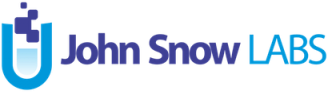

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/LM-Studio-Demo.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

# Getting started with LangTest

In [ ]:
!pip install "langtest[evaluate,openai]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [3]:
import os

os.environ["OPENAI_API_KEY"] =  "OPENAI_API_KEY"

In [ ]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# LM-Studio Model Testing For Question Answering

In this section, we dive into testing of LM-Studio models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

[Demo video](https://private-user-images.githubusercontent.com/101416953/301190402-d1f288d4-1d96-4d9c-9db2-4f87a9e69019.mp4?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MDY3MTA4MjYsIm5iZiI6MTcwNjcxMDUyNiwicGF0aCI6Ii8xMDE0MTY5NTMvMzAxMTkwNDAyLWQxZjI4OGQ0LTFkOTYtNGQ5Yy05ZGIyLTRmODdhOWU2OTAxOS5tcDQ_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ3JlZGVudGlhbD1BS0lBVkNPRFlMU0E1M1BRSzRaQSUyRjIwMjQwMTMxJTJGdXMtZWFzdC0xJTJGczMlMkZhd3M0X3JlcXVlc3QmWC1BbXotRGF0ZT0yMDI0MDEzMVQxNDE1MjZaJlgtQW16LUV4cGlyZXM9MzAwJlgtQW16LVNpZ25hdHVyZT0zZDAzNjczYTlhOWQxNTIwMmE0NTE3ZGZmZDc5YWEwYzA4NzM3NzE2MDJiNmRmMjliNmYxYTYxZTZjMjY3MDAyJlgtQW16LVNpZ25lZEhlYWRlcnM9aG9zdCZhY3Rvcl9pZD0wJmtleV9pZD0wJnJlcG9faWQ9MCJ9.EKxztmN9NuQodLQ_LqtUJ-_A9jowuclvbEWhVIqa6KA) : Running Hugging Face quantized models through LM-Studio and testing these models for a Question Answering task. 

In [5]:
model_name = "TheBloke/neural-chat-7B-v3-1-GGUF"
hub   = "lm-studio"
data_source  = "OpenBookQA"
split = "test-tiny"

## Robustness Testing

In [11]:
harness = Harness(
                  task="question-answering",
                  model={"model": "http://localhost:1234/v1/chat/completions", "hub":hub},
                  data={"data_source" :data_source,
                        "split":split},
                config= {
"model_parameters":{
  "max_tokens": 32,
 "server_prompt": "You are an AI bot specializing in providing accurate and concise answers to questions. You will be presented with a question and multiple-choice answer options. Your task is to choose the correct answer. Ensure that your response includes only the correct answer and no additional details.",
 "user_prompt": "Question: {question}\nOptions: {options}\n Select the correct option. Keep your response short and precise. Avoid additional explanations.\nYour Answer:",
  "temperature": 0.2,
  "stream":False
  }, 
 "evaluation": {"metric":"llm_eval","model":"gpt-3.5-turbo-instruct","hub":"openai"},
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                        }
          }
 }                           
                  )  

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 32,
  "server_prompt": "You are an AI bot specializing in providing accurate and concise answers to questions. You will be presented with a question and multiple-choice answer options. Your task is to choose the correct answer. Ensure that your response includes only the correct answer and no additional details.",
  "user_prompt": "Question: {question}\nOptions: {options}\n Select the correct option. Keep your response short and precise. Avoid additional explanations.\nYour Answer:",
  "temperature": 0.2,
  "stream": false
 },
 "evaluation": {
  "metric": "llm_eval",
  "model": "gpt-3.5-turbo-instruct",
  "hub": "openai"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "uppercase": {
    "min_pass_rate": 0.75
   },
   "add_speech_to_text_typo": {
    "min_pass_rate": 0.75
   },
   "add_ocr_typo": {
    "min_pass_rate": 0.75
   }
  }
 }
}


You can also set server_promt, prompts and other model parameters in config. Possible parameters are:
* `server_prompt:` Instructions or guidelines for the model to follow during the conversation.
* `user_prompt:` Users can provide a prompt that serves as a starting point  for the generated text. The prompt influences the content and style of the generated text by guiding the model's understanding and focus.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.
* `stream`: Enables real-time partial response transmission during API interactions.

### Generating the test cases.

In [12]:
harness.data = harness.data[:10]

In [13]:
harness.generate(seed=42)

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_speech_to_text_typo': 1 samples removed out of 10
[W010] - Test 'add_ocr_typo': 1 samples removed out of 10



harness.generate() method automatically generates the test cases (based on the provided configuration)

In [14]:
harness.testcases()

category                test_type  \
0   robustness                uppercase   
1   robustness                uppercase   
2   robustness                uppercase   
3   robustness                uppercase   
4   robustness                uppercase   
5   robustness                uppercase   
6   robustness                uppercase   
7   robustness                uppercase   
8   robustness                uppercase   
9   robustness                uppercase   
10  robustness  add_speech_to_text_typo   
11  robustness  add_speech_to_text_typo   
12  robustness  add_speech_to_text_typo   
13  robustness  add_speech_to_text_typo   
14  robustness  add_speech_to_text_typo   
15  robustness  add_speech_to_text_typo   
16  robustness  add_speech_to_text_typo   
17  robustness  add_speech_to_text_typo   
18  robustness  add_speech_to_text_typo   
19  robustness             add_ocr_typo   
20  robustness             add_ocr_typo   
21  robustness             add_ocr_typo   
22  robustness             add_ocr_typo   
23  robustness             add_ocr_typo   
24  robustness             add_ocr_typo   
25  robustness             add_ocr_typo   
26  robustness             add_ocr_typo   
27  robustness             add_ocr_typo   

                                    original_question  \
0   A person wants to start saving money so that t...   
1       There is most likely going to be fog around:    
2                                      Predators eat    
3   Oak tree seeds are planted and a sidewalk is p...   
4            An electric car runs on electricity via    
5   As the rain forest is deforested the atmospher...   
6      an electric car contains a motor that runs on    
7   The middle of the day usually involves the bri...   
8   The summer solstice in the northern hemisphere...   
9                      The main component in dirt is    
10  A person wants to start saving money so that t...   
11      There is most likely going to be fog around:    
12  Oak tree seeds are planted and a sidewalk is p...   
13           An electric car runs on electricity via    
14  As the rain forest is deforested the atmospher...   
15     an electric car contains a motor that runs on    
16  The middle of the day usually involves the bri...   
17  The summer solstice in the northern hemisphere...   
18                     The main component in dirt is    
19  A person wants to start saving money so that t...   
20      There is most likely going to be fog around:    
21                                     Predators eat    
22  Oak tree seeds are planted and a sidewalk is p...   
23  As the rain forest is deforested the atmospher...   
24     an electric car contains a motor that runs on    
25  The middle of the day usually involves the bri...   
26  The summer solstice in the northern hemisphere...   
27                     The main component in dirt is    

                                   perturbed_question  \
0   A PERSON WANTS TO START SAVING MONEY SO THAT T...   
1        THERE IS MOST LIKELY GOING TO BE FOG AROUND:   
2                                       PREDATORS EAT   
3   OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...   
4             AN ELECTRIC CAR RUNS ON ELECTRICITY VIA   
5   AS THE RAIN FOREST IS DEFORESTED THE ATMOSPHER...   
6       AN ELECTRIC CAR CONTAINS A MOTOR THAT RUNS ON   
7   THE MIDDLE OF THE DAY USUALLY INVOLVES THE BRI...   
8   THE SUMMER SOLSTICE IN THE NORTHERN HEMISPHERE...   
9                       THE MAIN COMPONENT IN DIRT IS   
10  A person wants to start saving Munni so that t...   
11    They're is most likely going to be fog around:    
12  Oak tree Cedes are planted and a sidewalk is p...   
13           'n electric car runs on electricity via    
14  As the Reine forest is deforested the atmosphe...   
15     'n electric car contains a motor that runs on    
16  The middle of the Dey usually involves the bri...   
17  The Sommer solstice in the northern hemisphere...   
18                   

harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [15]:
harness.run()

Running testcases... : 100%|██████████| 28/28 [00:12<00:00,  2.33it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [16]:
generated_results = harness.generated_results()

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

In [17]:
generated_results

category                test_type  \
0   robustness                uppercase   
1   robustness                uppercase   
2   robustness                uppercase   
3   robustness                uppercase   
4   robustness                uppercase   
5   robustness                uppercase   
6   robustness                uppercase   
7   robustness                uppercase   
8   robustness                uppercase   
9   robustness                uppercase   
10  robustness  add_speech_to_text_typo   
11  robustness  add_speech_to_text_typo   
12  robustness  add_speech_to_text_typo   
13  robustness  add_speech_to_text_typo   
14  robustness  add_speech_to_text_typo   
15  robustness  add_speech_to_text_typo   
16  robustness  add_speech_to_text_typo   
17  robustness  add_speech_to_text_typo   
18  robustness  add_speech_to_text_typo   
19  robustness             add_ocr_typo   
20  robustness             add_ocr_typo   
21  robustness             add_ocr_typo   
22  robustness             add_ocr_typo   
23  robustness             add_ocr_typo   
24  robustness             add_ocr_typo   
25  robustness             add_ocr_typo   
26  robustness             add_ocr_typo   
27  robustness             add_ocr_typo   

                                    original_question  \
0   A person wants to start saving money so that t...   
1       There is most likely going to be fog around:    
2                                      Predators eat    
3   Oak tree seeds are planted and a sidewalk is p...   
4            An electric car runs on electricity via    
5   As the rain forest is deforested the atmospher...   
6      an electric car contains a motor that runs on    
7   The middle of the day usually involves the bri...   
8   The summer solstice in the northern hemisphere...   
9                      The main component in dirt is    
10  A person wants to start saving money so that t...   
11      There is most likely going to be fog around:    
12  Oak tree seeds are planted and a sidewalk is p...   
13           An electric car runs on electricity via    
14  As the rain forest is deforested the atmospher...   
15     an electric car contains a motor that runs on    
16  The middle of the day usually involves the bri...   
17  The summer solstice in the northern hemisphere...   
18                     The main component in dirt is    
19  A person wants to start saving money so that t...   
20      There is most likely going to be fog around:    
21                                     Predators eat    
22  Oak tree seeds are planted and a sidewalk is p...   
23  As the rain forest is deforested the atmospher...   
24     an electric car contains a motor that runs on    
25  The middle of the day usually involves the bri...   
26  The summer solstice in the northern hemisphere...   
27                     The main component in dirt is    

                                   perturbed_question  \
0   A PERSON WANTS TO START SAVING MONEY SO THAT T...   
1        THERE IS MOST LIKELY GOING TO BE FOG AROUND:   
2                                       PREDATORS EAT   
3   OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS P...   
4             AN ELECTRIC CAR RUNS ON ELECTRICITY VIA   
5   AS THE RAIN FOREST IS DEFORESTED THE ATMOSPHER...   
6       AN ELECTRIC CAR CONTAINS A MOTOR THAT RUNS ON   
7   THE MIDDLE OF THE DAY USUALLY INVOLVES THE BRI...   
8   THE SUMMER SOLSTICE IN THE NORTHERN HEMISPHERE...   
9                       THE MAIN COMPONENT IN DIRT IS   
10  A person wants to start saving Munni so that t...   
11    They're is most likely going to be fog around:    
12  Oak tree Cedes are planted and a sidewalk is p...   
13           'n electric car runs on electricity via    
14  As the Reine forest is deforested the atmosphe...   
15     'n electric car contains a motor that runs on    
16  The middle of the Dey usually involves the bri...   
17  The Sommer solstice in the northern hemisphere...   
18                   

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [18]:
harness.report()

category                test_type  fail_count  pass_count pass_rate  \
0  robustness                uppercase           1           9       90%   
1  robustness  add_speech_to_text_typo           0           9      100%   
2  robustness             add_ocr_typo           2           7       78%   

  minimum_pass_rate  pass  
0               75%  True  
1               75%  True  
2               75%  True

## Accuracy

Available Accuracy tests for QA task are:

* `llm_eval`
* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [27]:
harness =Harness(
                model={"model": "http://localhost:1234/v1/chat/completions","hub":hub}, 
                  data={"data_source": data_source,
                        "split": split},
                    task="question-answering",
                config= {
"model_parameters":{
  "max_tokens": 32,
 "server_prompt": "You are an AI bot specializing in providing accurate and concise answers to questions. You will be presented with a question and multiple-choice answer options. Your task is to choose the correct answer. Ensure that your response includes only the correct answer and no additional details.",
 "user_prompt": "Question: {question}\nOptions: {options}\n Select the correct option. Keep your response short and precise. Avoid additional explanations.\nYour Answer:",
  "temperature": 0.2,
  "stream":False
  }, 
 'tests': {'defaults': {'min_pass_rate': 0.65},

           'accuracy': {'llm_eval': {'min_score': 0.75 , "model": "gpt-3.5-turbo-instruct","hub":"openai"},
                        'min_exact_match_score': {'min_score':  0.75},
                        'min_rouge1_score':{'min_score':  0.75},
                        'min_rougeL_score':{'min_score':  0.75},
                        'min_bleu_score':{'min_score':  0.75},
                        'min_rouge2_score':{'min_score':  0.75},
                        'min_rougeLsum_score':{'min_score':  0.75}

                        }
          }
 }
                    )

Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 32,
  "server_prompt": "You are an AI bot specializing in providing accurate and concise answers to questions. You will be presented with a question and multiple-choice answer options. Your task is to choose the correct answer. Ensure that your response includes only the correct answer and no additional details.",
  "user_prompt": "Question: {question}\nOptions: {options}\n Select the correct option. Keep your response short and precise. Avoid additional explanations.\nYour Answer:",
  "temperature": 0.2,
  "stream": false
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "accuracy": {
   "llm_eval": {
    "min_score": 0.75,
    "model": "gpt-3.5-turbo-instruct",
    "hub": "openai"
   },
   "min_exact_match_score": {
    "min_score": 0.75
   },
   "min_rouge1_score": {
    "min_score": 0.75
   },
   "min_rougeL_score": {
    "min_score": 0.75
   },
   "min_bleu_score": {
    "min_score": 0.75
   },
   "min_r

### Generating the Test Cases

In [20]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [21]:
harness.testcases()

category              test_type
0  accuracy               llm_eval
1  accuracy  min_exact_match_score
2  accuracy       min_rouge1_score
3  accuracy       min_rougeL_score
4  accuracy         min_bleu_score
5  accuracy       min_rouge2_score
6  accuracy    min_rougeLsum_score

### Running the tests

In [22]:
harness.run()

Running testcases... : 100%|██████████| 7/7 [01:54<00:00, 15.57s/it]

## Model Response

In [23]:
harness.model_response(category="accuracy")

original_question original_context  \
0   A person wants to start saving money so that t...                -   
1       There is most likely going to be fog around:                 -   
2                                      Predators eat                 -   
3   Oak tree seeds are planted and a sidewalk is p...                -   
4            An electric car runs on electricity via                 -   
5   As the rain forest is deforested the atmospher...                -   
6      an electric car contains a motor that runs on                 -   
7   The middle of the day usually involves the bri...                -   
8   The summer solstice in the northern hemisphere...                -   
9                      The main component in dirt is                 -   
10            It's easier for human's to survive in:                 -   
11                    A cactus stem is used to store                 -   
12  A red-tailed hawk is searching for prey. It is...                -   
13           The chance of wildfires is increased by                 -   
14           A positive effect of burning biofuel is                 -   
15  As gasoline costs rise, alternative fuels are ...                -   
16  A person wants to be able to have more natural...                -   
17                     A Mola Mola might live where?                 -   
18                    Which requires energy to move?                 -   
19              An animal that only eats plants is a                 -   
20  There was a lot more water vapor in the air wh...                -   
21  An example of conservation is avoiding the use...                -   
22    What can feathers on Spheniscidae be used for?                 -   
23                          Overpopulation can cause                 -   
24             Shining a light through a diamond can                 -   
25  If you were attacked by a shark and had to pun...                -   
26          which of these would stop a car quicker?                 -   
27  what system is needed for a body to get its ne...                -   
28  Every evening a child can look into the night ...                -   
29  When it's flying, a plane has no friction with...                -   
30                            To grow plants require                 -   
31  What is the best way to guess a babies eye col...                -   
32                          What animal eats plants?                 -   
33                   Which of these is a hypothesis?                 -   
34  What explains the characteristic lunar formati...                -   
35                     Tadpoles start their lives as                 -   
36  If a person puts out four apples around their ...                -   
37           What is used for sensing visual things?                 -   
38                    They studied the soil by using                 -   
39     Bill's arm got cold when he put it inside the                 -   
40                      A recyclable material can be                 -   
41  What is different about birth in humans and ch...                -   
42  Which of these situations is an example of pol...                -   
43                       Human reproduction requires                 -   
44                                      Thermometers                 -   
45  if the earth was a living room, what can be do...                -   
46          What would happen when balloons heat up?                 -   
47  A balloon is filled with helium for a party. A...                -   
48  Seals are most likely to be found in what type...                -   
49            When the eggs hatch, the offspring are                 -   

                                              options  \
0   A. make more phone calls\nB. quit eating lunch...   
1   A. a marsh\nB. a tundra\nC. the plains\nD. a d...   
2           A. lions\nB. humans\nC. bunnies\nD. grass   
3   A. roots may be split\nB. roo

### Generated Results

In [26]:
harness.generated_results()

category              test_type  expected_result  actual_result  pass
0  accuracy               llm_eval             0.75       0.900000  True
1  accuracy  min_exact_match_score             0.75       0.820000  True
2  accuracy       min_rouge1_score             0.75       0.853333  True
3  accuracy       min_rougeL_score             0.75       0.853333  True
4  accuracy         min_bleu_score             0.75       0.910872  True
5  accuracy       min_rouge2_score             0.75       0.830000  True
6  accuracy    min_rougeLsum_score             0.75       0.847619  True

### Final Results

In [25]:
harness.report()

category              test_type  fail_count  pass_count pass_rate  \
0  accuracy               llm_eval           0           1      100%   
1  accuracy  min_exact_match_score           0           1      100%   
2  accuracy       min_rouge1_score           0           1      100%   
3  accuracy       min_rougeL_score           0           1      100%   
4  accuracy         min_bleu_score           0           1      100%   
5  accuracy       min_rouge2_score           0           1      100%   
6  accuracy    min_rougeLsum_score           0           1      100%   

  minimum_pass_rate  pass  
0               65%  True  
1               65%  True  
2               65%  True  
3               65%  True  
4               65%  True  
5               65%  True  
6               65%  True